In [1]:
import geopandas as gpd
import pandas as pd
import torch
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from scipy.spatial import KDTree
from torch_geometric.data import Data

In [22]:
# Load GeoJSON dataset
gdf = gpd.read_file("data/combined_data_test.geojson")  # Ensure the filename matches
# Convert GeoDataFrame to CSV
#gdf.to_csv("data/combined_data4.csv", index=False)



In [23]:
print(gdf.head())
print(gdf.crs)
print(gdf.columns.to_list())
gdf.crs = "EPSG:25832"
print(gdf.crs)
print(gdf.shape)

                     id                                                B11  \
0  00000000000000000d5f  [ [ 0.18850000202655792, 0.18850000202655792, ...   
1  00000000000000000d60  [ [ 0.15530000627040863, 0.15530000627040863, ...   
2  00000000000000000d61  [ [ 0.19709999859333038, 0.19519999623298645, ...   
3  00000000000000000d62  [ [ 0.24719999730587006, 0.24120000004768372, ...   
4  00000000000000000d63  [ [ 0.26109999418258667, 0.26109999418258667, ...   

                                               B11_1  \
0  [ [ 0.19804999232292175, 0.19804999232292175, ...   
1  [ [ 0.17280000448226929, 0.17280000448226929, ...   
2  [ [ 0.2070000022649765, 0.20430000126361847, 0...   
3  [ [ 0.3010999858379364, 0.30419999361038208, 0...   
4                                               None   

                                               B11_2  \
0  [ [ 0.19615000486373901, 0.19615000486373901, ...   
1  [ [ 0.18860000371932983, 0.18860000371932983, ...   
2  [ [ 0.22450000047683716

In [24]:
depot = gdf
combined_gdf = gdf

In [25]:
# for now, we just select the NDVI, and keep id&species
select_col = ['id', 'B11', 'B11_1', 'B11_2', 'B11_3', 'B11_4', 'B11_5', 'B11_6', 'B11_7', 'B12', 'B12_1', 'B12_2', 'B12_3', 'B12_4', 'B12_5', 'B12_6', 'B12_7', 'B2', 'B2_1', 'B2_2', 'B2_3', 'B2_4', 'B2_5', 'B2_6', 'B2_7', 'B3', 'B3_1', 'B3_2', 'B3_3', 'B3_4', 'B3_5', 'B3_6', 'B3_7', 'B4', 'B4_1', 'B4_2', 'B4_3', 'B4_4', 'B4_5', 'B4_6', 'B4_7', 'B5', 'B5_1', 'B5_2', 'B5_3', 'B5_4', 'B5_5', 'B5_6', 'B5_7', 'B6', 'B6_1', 'B6_2', 'B6_3', 'B6_4', 'B6_5', 'B6_6', 'B6_7', 'B7', 'B7_1', 'B7_2', 'B7_3', 'B7_4', 'B7_5', 'B7_6', 'B7_7', 'B8', 'B8A', 'B8A_1', 'B8A_2', 'B8A_3', 'B8A_4', 'B8A_5', 'B8A_6', 'B8A_7', 'B8_1', 'B8_2', 'B8_3', 'B8_4', 'B8_5', 'B8_6', 'B8_7', 'EVI', 'EVI2', 'EVI2_1', 'EVI2_2', 'EVI2_3', 'EVI2_4', 'EVI2_5', 'EVI2_6', 'EVI2_7', 'EVI_1', 'EVI_2', 'EVI_3', 'EVI_4', 'EVI_5', 'EVI_6', 'EVI_7', 'NDVI', 'NDVI_1', 'NDVI_2', 'NDVI_3', 'NDVI_4', 'NDVI_5', 'NDVI_6', 'NDVI_7', 'NDWI', 'NDWI_1', 'NDWI_2', 'NDWI_3', 'NDWI_4', 'NDWI_5', 'NDWI_6', 'NDWI_7', 'SAVI', 'SAVI_1', 'SAVI_2', 'SAVI_3', 'SAVI_4', 'SAVI_5', 'SAVI_6', 'SAVI_7', 'l1_leaf_types', 'l2_genus', 'l3_species', 'geometry']
select_col_ = ['l1_leaf_types', 'l2_genus','l3_species', 'EVI', 'EVI2', 'EVI2_1', 'EVI2_2', 'EVI2_3', 'EVI2_4', 'EVI2_5', 'EVI2_6', 'EVI2_7', 'EVI_1', 'EVI_2', 'EVI_3', 'EVI_4', 'EVI_5', 'EVI_6', 'EVI_7','NDVI', 'NDVI_1', 'NDVI_2', 'NDVI_3', 'NDVI_4', 'NDVI_5', 'NDVI_6', 'NDVI_7', 'NDWI', 'NDWI_1', 'NDWI_2', 'NDWI_3', 'NDWI_4', 'NDWI_5', 'NDWI_6', 'NDWI_7', 'SAVI', 'SAVI_1', 'SAVI_2', 'SAVI_3', 'SAVI_4', 'SAVI_5', 'SAVI_6', 'SAVI_7']

select_df = combined_gdf[select_col]

nullds = select_df.isnull().sum()
print(nullds)

id                  0
B11                 0
B11_1            3723
B11_2               0
B11_3               0
                 ... 
SAVI_7            257
l1_leaf_types       0
l2_genus            0
l3_species          0
geometry            0
Length: 125, dtype: int64


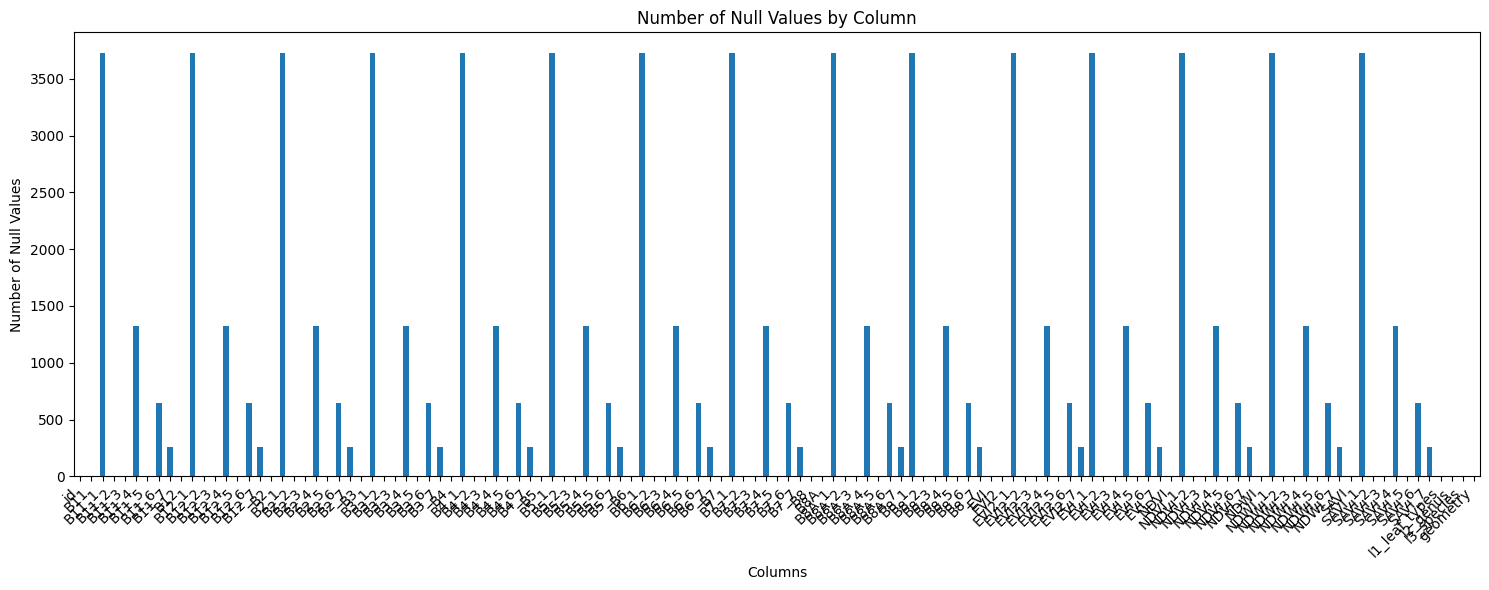

In [26]:
plt.figure(figsize=(15, 6))
nullds[nullds >= 0].plot(kind='bar')
plt.title('Number of Null Values by Column')
plt.xlabel('Columns')
plt.ylabel('Number of Null Values')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

In [27]:
# drop rows containing null values
select_df = select_df.dropna()

# drop rows containing 'none' (in any case) in any column
select_df = select_df[~select_df.apply(lambda row: row.astype(str).str.lower().eq('none').any(), axis=1)]

nullds = select_df.isnull().sum()
print(nullds)

id               0
B11              0
B11_1            0
B11_2            0
B11_3            0
                ..
SAVI_7           0
l1_leaf_types    0
l2_genus         0
l3_species       0
geometry         0
Length: 125, dtype: int64


In [28]:
# load the labels
labels = np.array(select_df[['l1_leaf_types', 'l2_genus','l3_species']])
sen2 = np.array(select_df[['B11', 'B11_1', 'B11_2', 'B11_3', 'B11_4', 'B11_5', 'B11_6', 'B12', 'B12_1', 'B12_2', 'B12_3', 'B12_4', 'B12_5', 'B12_6', 'B2', 'B2_1', 'B2_2', 'B2_3', 'B2_4', 'B2_5', 'B2_6', 'B3', 'B3_1', 'B3_2', 'B3_3', 'B3_4', 'B3_5', 'B3_6', 'B4', 'B4_1', 'B4_2', 'B4_3', 'B4_4', 'B4_5', 'B4_6', 'B5', 'B5_1', 'B5_2', 'B5_3', 'B5_4', 'B5_5', 'B5_6', 'B6', 'B6_1', 'B6_2', 'B6_3', 'B6_4', 'B6_5', 'B6_6', 'B7', 'B7_1', 'B7_2', 'B7_3', 'B7_4', 'B7_5', 'B7_6', 'B8', 'B8A', 'B8A_1', 'B8A_2','B8A_3', 'B8A_4', 'B8A_5', 'B8A_6', 'B8_1', 'B8_2', 'B8_3', 'B8_4', 'B8_5', 'B8_6', 'EVI', 'EVI2', 'EVI2_1', 'EVI2_2', 'EVI2_3', 'EVI2_4', 'EVI2_5', 'EVI2_6', 'EVI_1', 'EVI_2', 'EVI_3', 'EVI_4', 'EVI_5', 'EVI_6','NDVI', 'NDVI_1', 'NDVI_2', 'NDVI_3', 'NDVI_4', 'NDVI_5', 'NDVI_6', 'NDWI', 'NDWI_1', 'NDWI_2', 'NDWI_3', 'NDWI_4', 'NDWI_5', 'NDWI_6', 'SAVI', 'SAVI_1', 'SAVI_2', 'SAVI_3', 'SAVI_4', 'SAVI_5', 'SAVI_6']])
# show the shape
print("Labels shape: " + str(labels.shape))
#print("Sen2 shape: " + str(sen2.shape))

# print the labels
print(labels[:])
print(sen2[:])
print(sen2.shape)

Labels shape: (3792, 3)
[['needleleaf' 'pine' 'scots pine']
 ['needleleaf' 'pine' 'scots pine']
 ['needleleaf' 'pine' 'scots pine']
 ...
 ['broadleaf' 'oak' 'english oak']
 ['broadleaf' 'oak' 'english oak']
 ['broadleaf' 'oak' 'english oak']]
[['[ [ 0.18850000202655792, 0.18850000202655792, 0.20579999685287476, 0.20579999685287476, 0.20579999685287476 ], [ 0.18850000202655792, 0.18850000202655792, 0.20579999685287476, 0.20579999685287476, 0.20579999685287476 ], [ 0.18269999325275421, 0.18269999325275421, 0.19840000569820404, 0.19840000569820404, 0.19840000569820404 ], [ 0.18269999325275421, 0.18269999325275421, 0.19840000569820404, 0.19840000569820404, 0.19840000569820404 ], [ 0.18389999866485596, 0.18389999866485596, 0.19859999418258667, 0.19859999418258667, 0.19859999418258667 ] ]'
  '[ [ 0.19804999232292175, 0.19804999232292175, 0.21400000154972076, 0.21400000154972076, 0.21400000154972076 ], [ 0.19804999232292175, 0.19804999232292175, 0.21400000154972076, 0.21400000154972076, 0.214

In [29]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# load the labels
labels_l1 = np.array(select_df[['l1_leaf_types']])
labels_l2 = np.array(select_df[['l2_genus']])
labels_l3 = np.array(select_df[['l3_species']])


encoder = OneHotEncoder(sparse_output=False)
labels_l1 = encoder.fit_transform(labels_l1.reshape(-1, 1))
labels_l2 = encoder.fit_transform(labels_l2.reshape(-1, 1))
labels_l3 = encoder.fit_transform(labels_l3.reshape(-1, 1))
#print("Labels shape: " + str(labels.shape))
#print("\nFirst 19 rows:")

In [30]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
import numpy as np

print("Initial shapes:")
print(f"labels_l1: {labels_l1.shape}")
print(f"labels_l2: {labels_l2.shape}")
print(f"labels_l3: {labels_l3.shape}")
print(f"sen2: {sen2.shape}")

print(labels_l1.dtype)
print(labels_l2.dtype)
print(labels_l3.dtype)
print(sen2.dtype)

Initial shapes:
labels_l1: (3792, 2)
labels_l2: (3792, 9)
labels_l3: (3792, 19)
sen2: (3792, 105)
float64
float64
float64
object


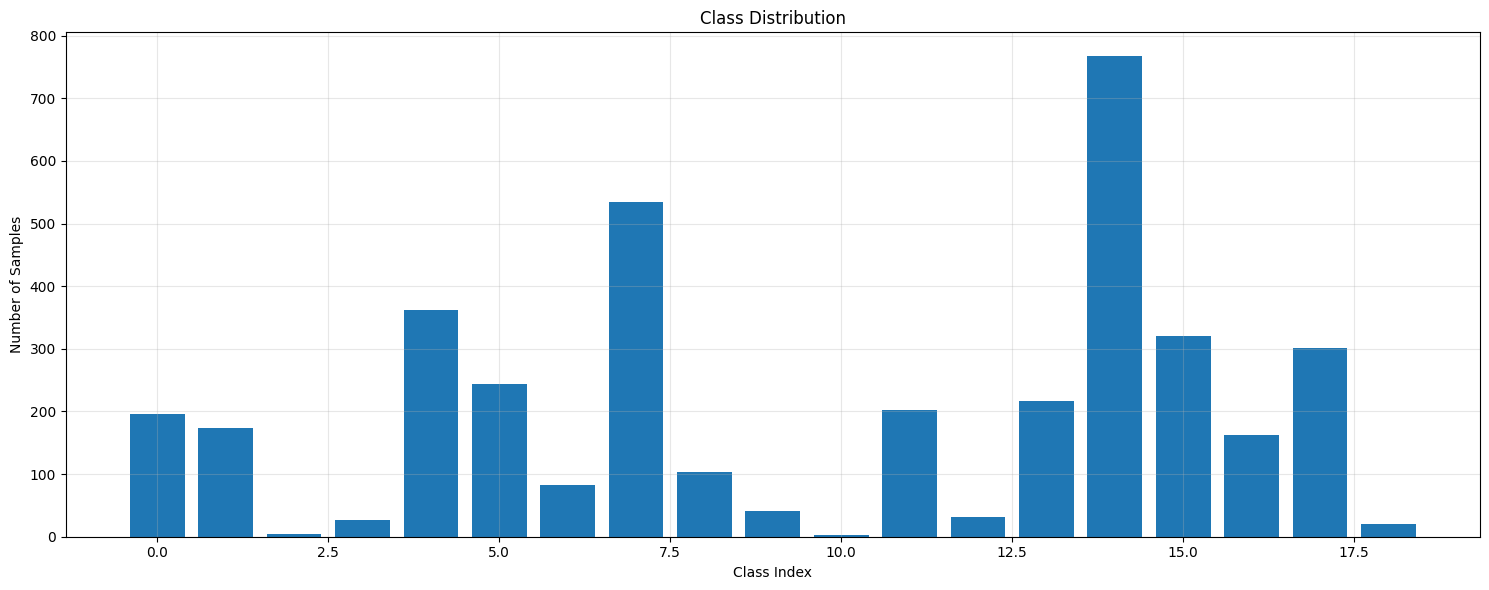

In [31]:
import matplotlib.pyplot as plt
# Get the sum of each column (class counts)
class_sizes = np.sum(labels_l3, axis=0)

# Create a bar plot
plt.figure(figsize=(15, 6))
plt.bar(range(len(class_sizes)), class_sizes)

# Add labels and title
plt.title('Class Distribution')
plt.xlabel('Class Index')
plt.ylabel('Number of Samples')

# Adjust layout
plt.tight_layout()

# Add grid for better readability
plt.grid(True, alpha=0.3)

In [32]:
import ast
# Convert string representation of arrays to actual numpy arrays
def convert_string_to_array(s):
	# Using ast.literal_eval to safely evaluate the string as a Python literal
	array_data = ast.literal_eval(s)
	return np.array(array_data)

# Convert all elements in sen2 to numpy arrays
sen2_arrays = np.array([convert_string_to_array(x) for x in sen2.flatten()])
number_samples = sen2.shape[0]
sen2_reshaped = sen2_arrays.reshape(number_samples, -1)

print("Post-processed Sentinel-2 data shape: ", sen2_reshaped.shape)

Post-processed Sentinel-2 data shape:  (3792, 2625)


In [39]:
from imblearn.over_sampling import SMOTE

# Create a dictionary for multiple classes
sampling_strategy = {
    0: 800,
    1: 800,
    2: 800,  
    3: 800,
    4: 800,  
    5: 800,   
    6: 800,
    7: 800,
    8: 800,
    9: 800,
    10: 800,
    11: 800,
    12: 800,
    13: 800,
    14: 800,
    15: 800,
    16: 800,
    17: 800,
    18: 800
}

# Reduce the number of neighbors to avoid the ValueError
smote = SMOTE(sampling_strategy=sampling_strategy, random_state=42, k_neighbors=1)
X_resampled, l3_resampled = smote.fit_resample(sen2_reshaped, np.argmax(labels_l3, axis=1))


# Update the labels_l3 with the resampled data
labels_l3_resampled = encoder.fit_transform(l3_resampled.reshape(-1, 1))

Resampled shapes: (15200, 19)
Resampled shapes: (15200, 2) (15200, 9)


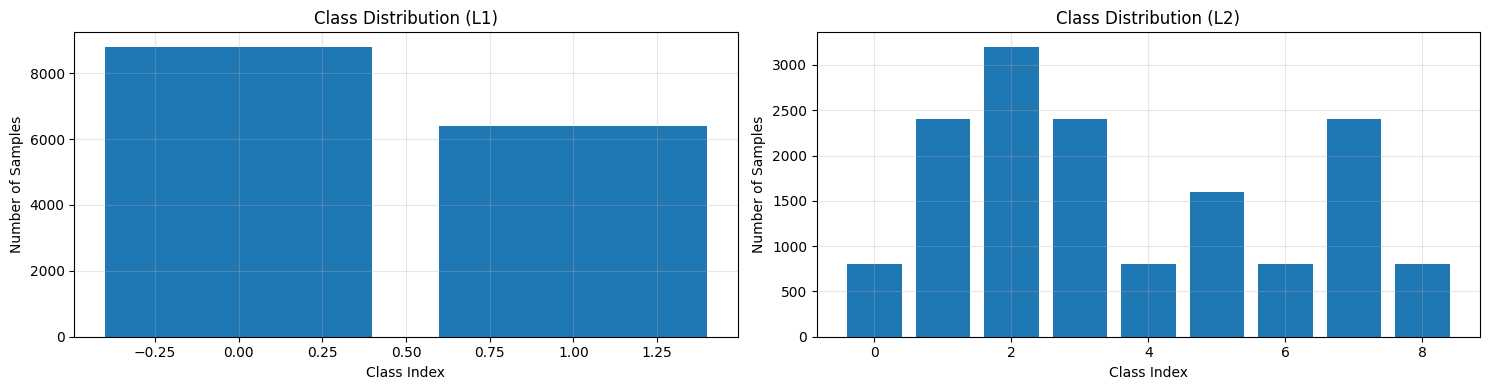

In [40]:
l3_to_l2_l1 = {
    0: (0, 0),  # "european beech" -> beech -> broadleaf
    1: (1, 0),  # "sessile oak"    -> oak   -> broadleaf
    2: (1, 0),  # "english oak"    -> oak   -> broadleaf
    3: (1, 0),  # "red oak"        -> oak   -> broadleaf
    4: (2, 0),  # "sycamore maple" -> long-lived dec. -> broadleaf
    5: (2, 0),  # “european ash”   -> long-lived dec. -> broadleaf
    6: (2, 0),
    7: (2, 0),
    8: (3, 0),
    9: (3, 0),
    10: (3, 0),
    # ...
    11: (4, 1), # "silver birch"   -> birch -> broadleaf
    12: (5, 1),
    13: (5, 1),
    14: (6, 1), # "norway spruce"  -> spruce -> needleleaf
    15: (7, 1), # "scots pine"     -> pine   -> needleleaf
    16: (7, 1), # "black pine"     -> pine   -> needleleaf
    17: (7, 1), # "weymouth pine"  -> pine   -> needleleaf
    18: (8, 1)  # "douglas fir"    -> douglas fir -> needleleaf
}

# Initialize resampled labels with the same number of rows as labels_l3_resampled
num_samples = labels_l3_resampled.shape[0]
num_l1_classes = labels_l1.shape[1]
num_l2_classes = labels_l2.shape[1]

labels_l1_resampled = np.zeros((num_samples, num_l1_classes))
labels_l2_resampled = np.zeros((num_samples, num_l2_classes))


for i in range(len(labels_l3_resampled)):
    l3_onehot = labels_l3_resampled[i]
    l3_idx = np.argmax(l3_onehot)  # which species is 1
    (correct_l2_idx, correct_l1_idx) = l3_to_l2_l1[l3_idx]

    # Zero out and set the corrected one-hot for L2
    labels_l2_resampled[i, :] = 0
    labels_l2_resampled[i, correct_l2_idx] = 1
    
    # Zero out and set the corrected one-hot for L1
    labels_l1_resampled[i, :] = 0
    labels_l1_resampled[i, correct_l1_idx] = 1

print("Resampled shapes:", labels_l3_resampled.shape)
print("Resampled shapes:", labels_l1_resampled.shape, labels_l2_resampled.shape)
# Get the sum of each column (class counts)
plt.figure(figsize=(15, 4))

# Plot for labels_l1_resampled
plt.subplot(1, 2, 1)
class_sizes_l1 = np.sum(labels_l1_resampled, axis=0)
plt.bar(range(len(class_sizes_l1)), class_sizes_l1)
plt.title('Class Distribution (L1)')
plt.xlabel('Class Index')
plt.ylabel('Number of Samples')
plt.grid(True, alpha=0.3)

# Plot for labels_l2_resampled
plt.subplot(1, 2, 2)
class_sizes_l2 = np.sum(labels_l2_resampled, axis=0)
plt.bar(range(len(class_sizes_l2)), class_sizes_l2)
plt.title('Class Distribution (L2)')
plt.xlabel('Class Index')
plt.ylabel('Number of Samples')
plt.grid(True, alpha=0.3)

plt.tight_layout()

In [41]:
import numpy as np
import torch
from torch_geometric.data import Data
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Extract features and labels
spectral_bands = [col for col in gdf.columns if col.startswith("B") or col in ['EVI', 'EVI2', 'EVI2_1', 'EVI2_2', 'EVI2_3', 'EVI2_4', 'EVI2_5', 'EVI2_6', 'EVI_1', 'EVI_2', 'EVI_3', 'EVI_4', 'EVI_5', 'EVI_6','NDVI', 'NDVI_1', 'NDVI_2', 'NDVI_3', 'NDVI_4', 'NDVI_5', 'NDVI_6', 'NDWI', 'NDWI_1', 'NDWI_2', 'NDWI_3', 'NDWI_4', 'NDWI_5', 'NDWI_6', 'SAVI', 'SAVI_1', 'SAVI_2', 'SAVI_3', 'SAVI_4', 'SAVI_5', 'SAVI_6']]
coords = np.vstack([select_df.geometry.x, select_df.geometry.y]).T.astype(float)  # Extract lat/lon

# Normalize spectral features
sen2_reshaped = sen2_reshaped.astype(np.float32)
scaler = StandardScaler().fit(sen2_reshaped)
normalized_features = scaler.transform(sen2_reshaped)

# Encode hierarchical labels
le_leaf = LabelEncoder().fit(select_df['l1_leaf_types'])
select_df["leaf_encoded"] = le_leaf.transform(select_df['l1_leaf_types'])
le_genus = LabelEncoder().fit(select_df['l2_genus'])
select_df["genus_encoded"] = le_genus.transform(select_df['l2_genus'])
le_species = LabelEncoder().fit(select_df['l3_species'])
select_df["species_encoded"] = le_species.transform(select_df['l3_species'])

# Create label nodes with the same feature dimension as tree nodes
num_features = normalized_features.shape[1]
leaf_nodes = torch.zeros((len(le_leaf.classes_), num_features))
genus_nodes = torch.zeros((len(le_genus.classes_), num_features))
species_nodes = torch.zeros((len(le_species.classes_), num_features))

# Concatenate labels and spectral features for each tree to form a single node
tree_nodes = torch.tensor(normalized_features, dtype=torch.float)

# Create edges to connect each tree node to its corresponding label nodes
edges = []
for i in range(tree_nodes.shape[0]):
    leaf_idx = select_df["leaf_encoded"].iloc[i]
    genus_idx = select_df["genus_encoded"].iloc[i]
    species_idx = select_df["species_encoded"].iloc[i]
    edges.append([i, tree_nodes.shape[0] + leaf_idx])
    edges.append([i, tree_nodes.shape[0] + len(le_leaf.classes_) + genus_idx])
    edges.append([i, tree_nodes.shape[0] + len(le_leaf.classes_) + len(le_genus.classes_) + species_idx])

# Create directed hierarchical edges between label nodes
for i in range(len(le_species.classes_)):
    species_idx = i
    genus_idx = le_genus.transform([select_df[select_df['l3_species'] == le_species.inverse_transform([i])[0]]['l2_genus'].iloc[0]])[0]
    leaf_idx = le_leaf.transform([select_df[select_df['l3_species'] == le_species.inverse_transform([i])[0]]['l1_leaf_types'].iloc[0]])[0]
    edges.append([tree_nodes.shape[0] + leaf_idx, tree_nodes.shape[0] + len(le_leaf.classes_) + genus_idx])
    edges.append([tree_nodes.shape[0] + len(le_leaf.classes_) + genus_idx, tree_nodes.shape[0] + len(le_leaf.classes_) + len(le_genus.classes_) + species_idx])



edges = torch.tensor(edges, dtype=torch.long).t().contiguous()

# Combine all nodes
nodes = torch.cat([tree_nodes, leaf_nodes, genus_nodes, species_nodes], dim=0)

# Save preprocessed dataset
preprocessed_data = {
    "nodes": nodes,
    "edge_index": edges,
    "leaf_labels": torch.tensor(select_df["leaf_encoded"].values, dtype=torch.long),
    "genus_labels": torch.tensor(select_df["genus_encoded"].values, dtype=torch.long),
    "species_labels": torch.tensor(select_df["species_encoded"].values, dtype=torch.long),
}

print("Nodes shape:", nodes.shape)
print("Edge index shape:", edges.shape)

Nodes shape: torch.Size([3822, 2625])
Edge index shape: torch.Size([2, 11414])


In [42]:
import random

# Function to check if a node is correctly connected to its labels
def check_node_connections(node_idx, tree_nodes, edge_index, select_df, le_leaf, le_genus, le_species):
    # Get the actual labels for the node
    actual_leaf = select_df["leaf_encoded"].iloc[node_idx]
    actual_genus = select_df["genus_encoded"].iloc[node_idx]
    actual_species = select_df["species_encoded"].iloc[node_idx]

    # Get the connected nodes from the edge index
    connected_nodes = edge_index[1][edge_index[0] == node_idx].tolist()

    # Check if the node is connected to the correct label nodes
    leaf_connected = tree_nodes.shape[0] + actual_leaf in connected_nodes
    genus_connected = tree_nodes.shape[0] + len(le_leaf.classes_) + actual_genus in connected_nodes
    species_connected = tree_nodes.shape[0] + len(le_leaf.classes_) + len(le_genus.classes_) + actual_species in connected_nodes

    return leaf_connected, genus_connected, species_connected

# Function to check if every node has edges
def check_all_nodes_have_edges(tree_nodes, edge_index):
    nodes_with_edges = set(edge_index[0].tolist())
    all_nodes = set(range(tree_nodes.shape[0]))
    nodes_without_edges = all_nodes - nodes_with_edges
    return len(nodes_without_edges) == 0, nodes_without_edges

# Check some random nodes
num_checks = 5
random_nodes = random.sample(range(tree_nodes.shape[0]), num_checks)
for node_idx in random_nodes:
    leaf_connected, genus_connected, species_connected = check_node_connections(node_idx, tree_nodes, edge_index, select_df, le_leaf, le_genus, le_species)
    print(f"Node {node_idx}: Leaf Connected: {leaf_connected}, Genus Connected: {genus_connected}, Species Connected: {species_connected}")

# Check if every node has edges
all_nodes_have_edges, nodes_without_edges = check_all_nodes_have_edges(tree_nodes, edge_index)
print(f"All nodes have edges: {all_nodes_have_edges}")
if not all_nodes_have_edges:
    print(f"Nodes without edges: {nodes_without_edges}")

NameError: name 'edge_index' is not defined

In [43]:
# Function to check if label nodes are correctly connected based on hierarchical structure
def check_label_connections(edge_index, tree_nodes, select_df, le_leaf, le_genus, le_species):
    # Create dictionaries to store the expected connections
    expected_leaf_to_genus = {}
    expected_genus_to_species = {}

    for i in range(len(select_df)):
        leaf_idx = select_df["leaf_encoded"].iloc[i]
        genus_idx = select_df["genus_encoded"].iloc[i]
        species_idx = select_df["species_encoded"].iloc[i]

        if leaf_idx not in expected_leaf_to_genus:
            expected_leaf_to_genus[leaf_idx] = set()
        expected_leaf_to_genus[leaf_idx].add(genus_idx)

        if genus_idx not in expected_genus_to_species:
            expected_genus_to_species[genus_idx] = set()
        expected_genus_to_species[genus_idx].add(species_idx)

    # Check the actual connections in the edge_index
    actual_leaf_to_genus = {}
    actual_genus_to_species = {}

    for i in range(tree_nodes.shape[0], tree_nodes.shape[0] + len(le_leaf.classes_)):
        connected_nodes = edge_index[1][edge_index[0] == i].tolist()
        actual_leaf_to_genus[i - tree_nodes.shape[0]] = set(
            [node - tree_nodes.shape[0] - len(le_leaf.classes_) for node in connected_nodes if node >= tree_nodes.shape[0] + len(le_leaf.classes_)]
        )

    for i in range(tree_nodes.shape[0] + len(le_leaf.classes_), tree_nodes.shape[0] + len(le_leaf.classes_) + len(le_genus.classes_)):
        connected_nodes = edge_index[1][edge_index[0] == i].tolist()
        actual_genus_to_species[i - tree_nodes.shape[0] - len(le_leaf.classes_)] = set(
            [node - tree_nodes.shape[0] - len(le_leaf.classes_) - len(le_genus.classes_) for node in connected_nodes if node >= tree_nodes.shape[0] + len(le_leaf.classes_) + len(le_genus.classes_)]
        )

    # Compare expected and actual connections
    leaf_to_genus_correct = expected_leaf_to_genus == actual_leaf_to_genus
    genus_to_species_correct = expected_genus_to_species == actual_genus_to_species

    return leaf_to_genus_correct, genus_to_species_correct

# Check if label nodes are correctly connected
leaf_to_genus_correct, genus_to_species_correct = check_label_connections(edge_index, tree_nodes, select_df, le_leaf, le_genus, le_species)
print(f"Leaf to Genus connections correct: {leaf_to_genus_correct}")
print(f"Genus to Species connections correct: {genus_to_species_correct}")

NameError: name 'edge_index' is not defined

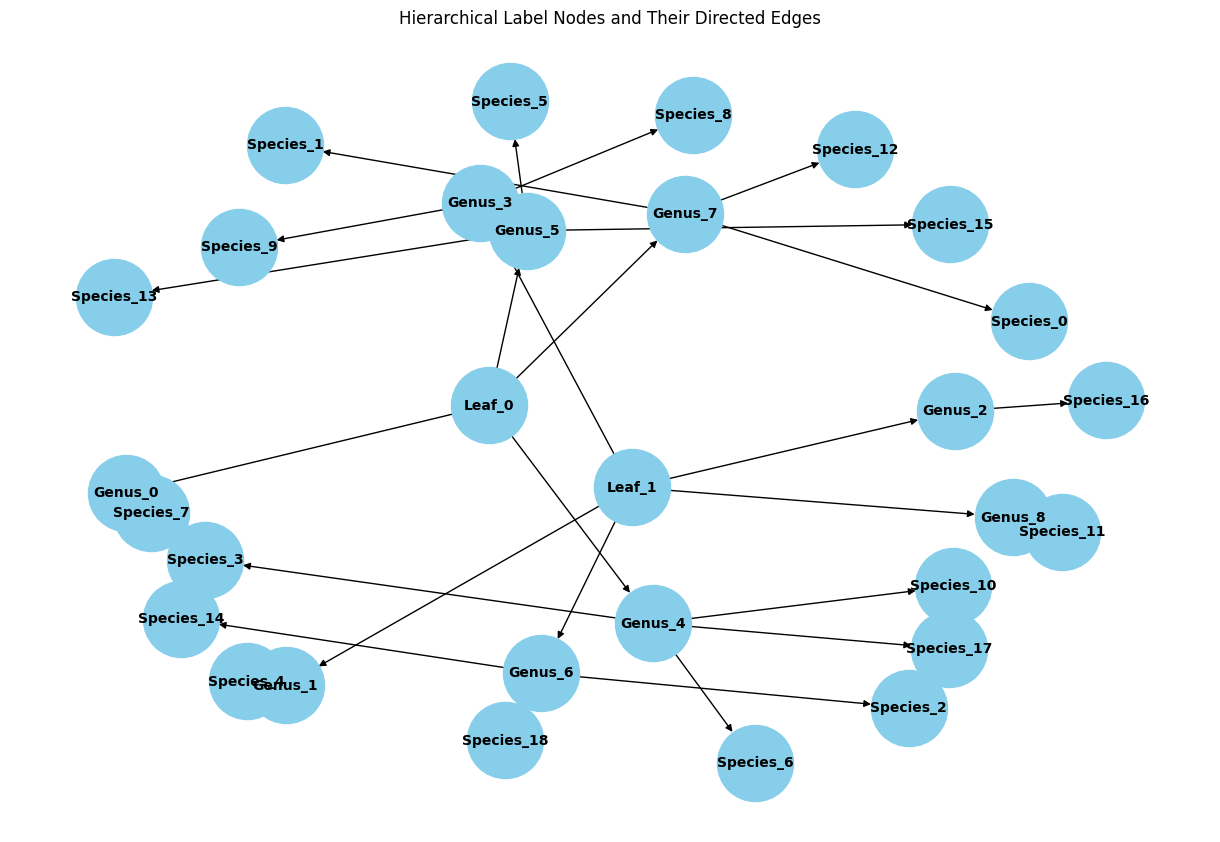

In [44]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Add label nodes to the graph
for i in range(len(le_leaf.classes_)):
    G.add_node(f"Leaf_{i}", label="Leaf")

for i in range(len(le_genus.classes_)):
    G.add_node(f"Genus_{i}", label="Genus")

for i in range(len(le_species.classes_)):
    G.add_node(f"Species_{i}", label="Species")

# Add directed edges between label nodes based on the hierarchical structure
for i in range(len(le_species.classes_)):
    species_idx = i
    genus_idx = le_genus.transform([select_df[select_df['l3_species'] == le_species.inverse_transform([i])[0]]['l2_genus'].iloc[0]])[0]
    leaf_idx = le_leaf.transform([select_df[select_df['l3_species'] == le_species.inverse_transform([i])[0]]['l1_leaf_types'].iloc[0]])[0]
    G.add_edge(f"Leaf_{leaf_idx}", f"Genus_{genus_idx}")
    G.add_edge(f"Genus_{genus_idx}", f"Species_{species_idx}")

# Draw the graph
pos = nx.spring_layout(G)  # Layout for visualization
plt.figure(figsize=(12, 8))
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="skyblue", font_size=10, font_weight="bold", arrows=True)
plt.title("Hierarchical Label Nodes and Their Directed Edges")
plt.show()

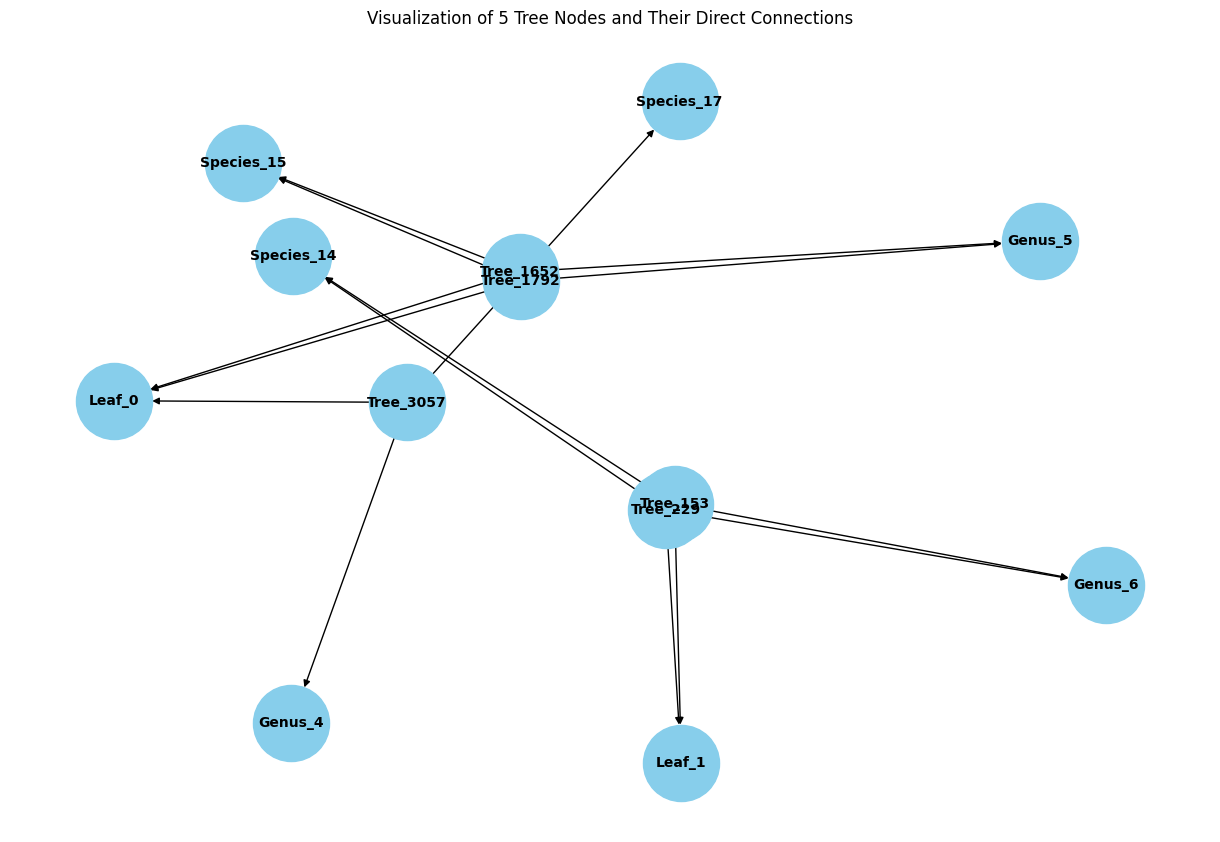

In [45]:
# Create a directed graph
G = nx.DiGraph()

# Randomly select 5 tree nodes
num_tree_nodes = tree_nodes.shape[0]
random_tree_nodes = random.sample(range(num_tree_nodes), 5)

# Add tree nodes and their edges to the graph
for node_idx in random_tree_nodes:
    G.add_node(f"Tree_{node_idx}", label="Tree")
    leaf_idx = select_df["leaf_encoded"].iloc[node_idx]
    genus_idx = select_df["genus_encoded"].iloc[node_idx]
    species_idx = select_df["species_encoded"].iloc[node_idx]
    
    # Add label nodes if they are not already added
    if f"Leaf_{leaf_idx}" not in G:
        G.add_node(f"Leaf_{leaf_idx}", label="Leaf")
    if f"Genus_{genus_idx}" not in G:
        G.add_node(f"Genus_{genus_idx}", label="Genus")
    if f"Species_{species_idx}" not in G:
        G.add_node(f"Species_{species_idx}", label="Species")
    
    # Add edges from tree node to its corresponding label nodes
    G.add_edge(f"Tree_{node_idx}", f"Leaf_{leaf_idx}")
    G.add_edge(f"Tree_{node_idx}", f"Genus_{genus_idx}")
    G.add_edge(f"Tree_{node_idx}", f"Species_{species_idx}")

# Draw the graph
pos = nx.spring_layout(G)  # Layout for visualization
plt.figure(figsize=(12, 8))
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="skyblue", font_size=10, font_weight="bold", arrows=True)
plt.title("Visualization of 5 Tree Nodes and Their Direct Connections")
plt.show()

https://colab.research.google.com/drive/1d0jLDwgNBtjBVQOFe8lO_1WrqTVeVZx9?usp=sharing

In [46]:
import os
import torch

# Directory to save the graph data
save_dir = "data"
os.makedirs(save_dir, exist_ok=True)

# File path to save the graph data
save_path = os.path.join(save_dir, "graph_data_test.pt")

# Save the graph data
torch.save(preprocessed_data, save_path)
print(f"Graph data saved to {save_path}")

Graph data saved to data\graph_data_test.pt


In [56]:
import torch

# File path to load the graph data
load_path = os.path.join(save_dir, "graph_data.pt")

# Load the graph data
loaded_data = torch.load(load_path)
print(f"Graph data loaded from {load_path}")

# Access the loaded data
nodes = loaded_data["nodes"]
edge_index = loaded_data["edge_index"]
leaf_labels = loaded_data["leaf_labels"]
genus_labels = loaded_data["genus_labels"]
species_labels = loaded_data["species_labels"]

print("Nodes shape:", nodes.shape)
print("Edge index shape:", edge_index.shape)

Graph data loaded from data\graph_data.pt
Nodes shape: torch.Size([35995, 2625])
Edge index shape: torch.Size([2, 107933])
